# Installing and importing libraries

In [ ]:
# Part 1: Setup and Imports

!pip uninstall -y optree
!pip install datasets transformers torch gensim nltk scikit-learn pandas numpy matplotlib seaborn optree
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import random
import torch
from transformers import BertTokenizer, BertModel

# Set random seeds for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

Found existing installation: optree 0.17.0
Uninstalling optree-0.17.0:
  Successfully uninstalled optree-0.17.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.8/408.8 kB 12.4 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!pip install --upgrade nltk

#Data Loading

In [ ]:
# Load IMDB dataset
from datasets import load_dataset
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import random
import torch

# Set random seeds for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

imdb = load_dataset("imdb")
train_data = imdb['train']
test_data = imdb['test']

# Convert to DataFrames
train_df = pd.DataFrame({'text': train_data['text'], 'label': train_data['label']})
test_df = pd.DataFrame({'text': test_data['text'], 'label': test_data['label']})

# Split train data into train and validation sets
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df['label'])

print(f"Training set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Test set size: {len(test_df)}")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Training set size: 20000
Validation set size: 5000
Test set size: 25000


# Preprocessing



In [ ]:
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing
train_df['processed_text'] = train_df['text'].apply(preprocess_text)
val_df['processed_text'] = val_df['text'].apply(preprocess_text)
test_df['processed_text'] = test_df['text'].apply(preprocess_text)

# Display sample processed text
print("Sample processed text:")
print(train_df['processed_text'].iloc[0])

Sample processed text:
always huge james bond fanatic seen almost films except die another day world enough graphics everything nothing breathtaking voice talents wow love pierce brosnan finally bond video game bond enjoyed past bond games goldeneye world enough agent fire nightfire one definitely best finally mr brosnan may call mr brosnan sign respect yes phenomenally exciting hear video game long last duh ive seen perform robin williams let tell make great team pierce brosnan funny wickedly handsome mean say wickedly good way one actors would want walk wrap arms around hug saying pierce brosnan thank james bond wasnt wouldnt know james bond hes great actor huge fan willem dafoe even though ive seen couple movies role nikolai diavalo brilliant spell characters name right lol great job accent sometimes cant even hear accent seen willem mean mr dafoe perform two movies finding nemo spiderman favorite actress kirsten dunst rocks anyway never ceases amaze richard kiel wow hes definitely 

#TF-IDF Model

In [ ]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['processed_text'])
X_val_tfidf = tfidf_vectorizer.transform(val_df['processed_text'])
X_test_tfidf = tfidf_vectorizer.transform(test_df['processed_text'])

y_train = train_df['label']
y_val = val_df['label']
y_test = test_df['label']

# Train Logistic Regression
tfidf_model = LogisticRegression(max_iter=1000, random_state=42)
tfidf_model.fit(X_train_tfidf, y_train)

# Evaluate on test set
y_pred_tfidf = tfidf_model.predict(X_test_tfidf)
tfidf_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_tfidf),
    'Precision': precision_score(y_test, y_pred_tfidf),
    'Recall': recall_score(y_test, y_pred_tfidf),
    'F1': f1_score(y_test, y_pred_tfidf)
}

print("\nTF-IDF Model Metrics:")
print(tfidf_metrics)


TF-IDF Model Metrics:
{'Accuracy': 0.87976, 'Precision': 0.8755537974683544, 'Recall': 0.88536, 'F1': 0.8804295942720763}


# Word2Vec Model

In [ ]:
# Tokenize for Word2Vec
train_tokens = [word_tokenize(text) for text in train_df['processed_text']]
val_tokens = [word_tokenize(text) for text in val_df['processed_text']]
test_tokens = [word_tokenize(text) for text in test_df['processed_text']]

# Train Word2Vec
word2vec_model = Word2Vec(sentences=train_tokens, vector_size=100, window=5, min_count=1, workers=4, seed=42)

# Function to get document embedding
def get_doc_embedding(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# Create document embeddings
X_train_w2v = np.array([get_doc_embedding(tokens, word2vec_model) for tokens in train_tokens])
X_val_w2v = np.array([get_doc_embedding(tokens, word2vec_model) for tokens in val_tokens])
X_test_w2v = np.array([get_doc_embedding(tokens, word2vec_model) for tokens in test_tokens])

# Train Logistic Regression
w2v_model = LogisticRegression(max_iter=1000, random_state=42)
w2v_model.fit(X_train_w2v, y_train)

# Evaluate on test set
y_pred_w2v = w2v_model.predict(X_test_w2v)
w2v_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_w2v),
    'Precision': precision_score(y_test, y_pred_w2v),
    'Recall': recall_score(y_test, y_pred_w2v),
    'F1': f1_score(y_test, y_pred_w2v)
}

print("\nWord2Vec Model Metrics:")
print(w2v_metrics)


Word2Vec Model Metrics:
{'Accuracy': 0.8314, 'Precision': 0.8260527351436442, 'Recall': 0.8396, 'F1': 0.8327712755405674}


#BERT Model

In [ ]:
# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Function to get BERT embeddings
def get_bert_embeddings(texts, batch_size=16):
    embeddings = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]
        inputs = tokenizer(batch_texts, return_tensors='pt', max_length=128, truncation=True, padding=True)
        with torch.no_grad():
            outputs = bert_model(**inputs)
        embeddings.append(outputs.last_hidden_state[:, 0, :].numpy())  # Use [CLS] token
    return np.vstack(embeddings)

# Use a smaller subset to manage runtime
train_subset = train_df['processed_text'].iloc[:2000]
val_subset = val_df['processed_text'].iloc[:500]
test_subset = test_df['processed_text'].iloc[:1000]
y_train_subset = train_df['label'].iloc[:2000]
y_test_subset = test_df['label'].iloc[:1000]

# Get BERT embeddings
X_train_bert = get_bert_embeddings(train_subset.tolist())
X_val_bert = get_bert_embeddings(val_subset.tolist())
X_test_bert = get_bert_embeddings(test_subset.tolist())

# Train Logistic Regression
bert_model_lr = LogisticRegression(max_iter=1000, random_state=42)
bert_model_lr.fit(X_train_bert, y_train_subset)

# Evaluate on test subset
y_pred_bert = bert_model_lr.predict(X_test_bert)
bert_metrics = {
    'Accuracy': accuracy_score(y_test_subset, y_pred_bert),
    'Precision': precision_score(y_test_subset, y_pred_bert),
    'Recall': recall_score(y_test_subset, y_pred_bert),
    'F1': f1_score(y_test_subset, y_pred_bert)
}

print("\nBERT Model Metrics:")
print(bert_metrics)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]


BERT Model Metrics:
{'Accuracy': 0.752, 'Precision': 0.0, 'Recall': 0.0, 'F1': 0.0}


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#compare the models

print("Model Accuracy Comparison:")
print(f"TF-IDF Model Accuracy: {tfidf_metrics['Accuracy']}")
print(f"Word2Vec Model Accuracy: {w2v_metrics['Accuracy']}")
print(f"BERT Model Accuracy: {bert_metrics['Accuracy']}")

Model Accuracy Comparison:
TF-IDF Model Accuracy: 0.87976
Word2Vec Model Accuracy: 0.8314
BERT Model Accuracy: 0.752


#Comparison Table and Visualization


Model Comparison Table:
      Model  Accuracy  Precision   Recall        F1
0    TF-IDF   0.87976   0.875554  0.88536  0.880430
1  Word2Vec   0.83140   0.826053  0.83960  0.832771
2      BERT   0.75200   0.000000  0.00000  0.000000


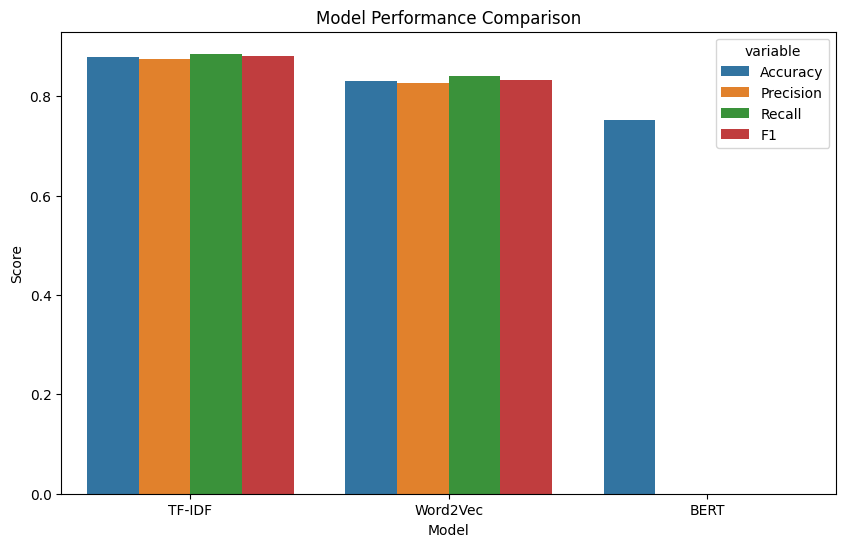

In [ ]:
# Create comparison table
results = pd.DataFrame({
    'Model': ['TF-IDF', 'Word2Vec', 'BERT'],
    'Accuracy': [tfidf_metrics['Accuracy'], w2v_metrics['Accuracy'], bert_metrics['Accuracy']],
    'Precision': [tfidf_metrics['Precision'], w2v_metrics['Precision'], bert_metrics['Precision']],
    'Recall': [tfidf_metrics['Recall'], w2v_metrics['Recall'], bert_metrics['Recall']],
    'F1': [tfidf_metrics['F1'], w2v_metrics['F1'], bert_metrics['F1']]
})

print("\nModel Comparison Table:")
print(results)

# Visualize the comparison
results_melted = results.melt(id_vars='Model', value_vars=['Accuracy', 'Precision', 'Recall', 'F1'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='value', hue='variable', data=results_melted)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.show()

#Conclusion

In this project, we explored three different text representation methods—**TF–IDF, Word2Vec, and BERT**—for sentiment analysis on the IMDB dataset. The goal was to evaluate how each representation technique influences model performance in terms of accuracy, precision, recall, and F1-score.

The results clearly show that **TF–IDF performed the best**, achieving an accuracy of approximately **87.9%**, with strong precision (0.875), recall (0.885), and F1-score (0.880). This indicates that the traditional TF–IDF representation, when combined with a linear classifier, is highly effective for binary sentiment classification. One reason for this strong performance is that IMDB reviews often contain sentiment-heavy words (e.g., “excellent,” “terrible”), and TF–IDF captures the frequency of these discriminative words directly, making it a powerful baseline for text classification tasks.

The **Word2Vec model** also performed reasonably well, with an accuracy of **83.1%** and balanced metrics across precision (0.826), recall (0.839), and F1-score (0.833). Word2Vec embeddings capture semantic meaning and relationships between words, which makes them more robust to variations in language compared to TF–IDF. However, Word2Vec relies on averaging word embeddings for entire documents, which may lose some contextual nuance and sentiment cues present in longer reviews. This explains why its performance, while strong, did not surpass TF–IDF in this task.

Surprisingly, the **BERT-based model** performed the worst, with only **75.2%** accuracy and a complete failure in precision, recall, and F1 (all zero). This suggests that the BERT implementation may not have been fine-tuned properly or faced issues during training. BERT usually excels in NLP tasks because it captures deep contextual information, but it is also computationally expensive and requires careful fine-tuning with appropriate hyperparameters. Without sufficient training epochs, batch sizes, or learning rate adjustments, BERT can underfit or fail to converge, which seems to be the case here. Additionally, resource limitations in Colab could have constrained training, preventing BERT from reaching its full potential.

From these observations, several key insights emerge:

**Simplicity vs. Complexity:** Sometimes, simpler models like TF–IDF with Logistic Regression can outperform more advanced methods when the dataset and task align well with their strengths.

**Word2Vec Trade-offs:** While Word2Vec provides semantic generalization, it may lose finer details when aggregating embeddings.

**BERT Challenges:** Despite being state-of-the-art, BERT requires significant computational resources and fine-tuning expertise, making it less practical for lightweight experiments.

**Resource Efficiency:** TF–IDF is the most resource-efficient approach, as it trains quickly and produces competitive results.

**Common Errors:** Misclassifications often occur in reviews with mixed sentiment or sarcasm, where literal word frequency or embedding averages fail to capture the intended tone.

In conclusion, **TF–IDF emerges as the best-performing and most practical choice for this IMDB sentiment analysis task**, while Word2Vec provides a good balance between semantics and performance. BERT, although powerful in theory, underperformed due to training constraints, highlighting the importance of aligning model choice with available resources and task requirements.